In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
import random
import numpy as np
from asyncio import exceptions

In [3]:
def pickle_load(dir, filename):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'rb')

  # dump information to that file
  data = pickle.load(file)

  # close the file
  file.close()
  return data

In [4]:
dir = '/content/drive/MyDrive/CVPR/Project/Pickle 2'
training_data_x = pickle_load(dir, "training_data_x.pk")
training_data_y = pickle_load(dir, "training_data_y.pk")

testing_data_x = pickle_load(dir, "testing_data_x.pk")
testing_data_y = pickle_load(dir, "testing_data_y.pk")

In [5]:
img_size = 256
categories = ['glioma', 'meningioma', 'no tumor', 'pituitary']

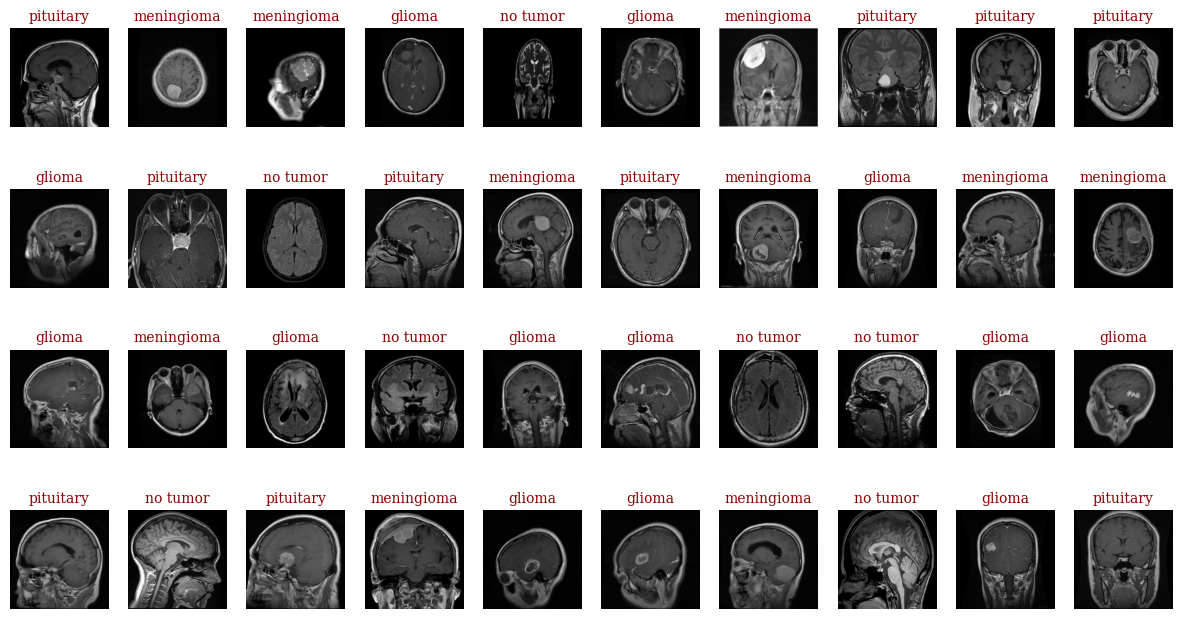

In [6]:
# Dataset 1
plt.figure(figsize=(15,8))
for i, img in enumerate(training_data_x) :
    plt.subplot(4,10, i+1)
    img = np.reshape(img, (img_size,img_size,3))
    plt.imshow(img)
    plt.axis('off')
    fontdict={'family': 'serif','color':  'darkred','weight': 'normal', 'size': 10,}
    category = categories[training_data_y[i]]
    plt.title(category, fontdict=fontdict)
    if (i+1) == 40:
        break
plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical
training_data_y = to_categorical(training_data_y, 4)
testing_data_y = to_categorical(testing_data_y, 4)

In [8]:
print(training_data_x.shape, training_data_y.shape)
print(training_data_x.shape, training_data_y.shape)

(500, 256, 256, 3) (500, 4)
(500, 256, 256, 3) (500, 4)


In [9]:
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.layers import Input, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model

94765736/94765736 [==============================] - 3s 0us/step


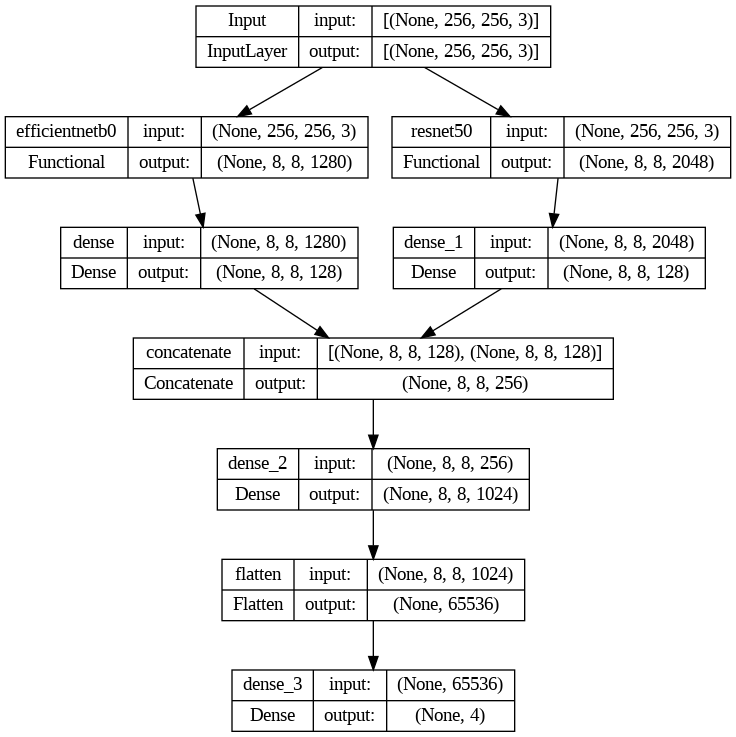

In [10]:
img_size = 256
ip_img = Input(shape=(img_size,img_size,3), name="Input")

#Model 1
model1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))(ip_img)
dense1 = Dense(128, activation='relu')(model1)

#Model 2
model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))(ip_img)
dense2 = Dense(128, activation='relu')(model2)


#Merging model A and B
merge = concatenate([dense1, dense2])  # Merge dense1 and dense2
merge = Dense(1024, activation='relu')(merge)
merge = Flatten()(merge)
merge = Dense(4, activation='softmax')(merge)

# Create the model
model = Model(inputs=ip_img, outputs=merge)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
hist = model.fit(x=training_data_x, y = training_data_y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 771s 54s/step - loss: 3.2442 - accuracy: 0.5000 - val_loss: 1.3938 - val_accuracy: 0.3300
Epoch 2/10
13/13 [==============================] - 701s 54s/step - loss: 0.5382 - accuracy: 0.8325 - val_loss: 1.3441 - val_accuracy: 0.6500
Epoch 3/10
13/13 [==============================] - 685s 53s/step - loss: 0.2859 - accuracy: 0.9175 - val_loss: 0.7684 - val_accuracy: 0.7800
Epoch 4/10
13/13 [==============================] - 683s 53s/step - loss: 0.1499 - accuracy: 0.9650 - val_loss: 0.9759 - val_accuracy: 0.8200
Epoch 5/10
13/13 [==============================] - 679s 53s/step - loss: 0.1052 - accuracy: 0.9650 - val_loss: 1.3544 - val_accuracy: 0.7800
Epoch 6/10
13/13 [==============================] - 683s 53s/step - loss: 0.1207 - accuracy: 0.9600 - val_loss: 0.8673 - val_accuracy: 0.8400
Epoch 7/10
13/13 [==============================] - 681s 52s/step - loss: 0.0525 - accuracy: 0.9850 - val_loss: 1.3452 - val_accuracy: 0.8500
Epoch 

In [13]:
results = model.evaluate(testing_data_x, testing_data_y, batch_size=128)
print("test loss, test acc:", results)

1/1 [==============================] - 37s 37s/step - loss: 2.3463 - accuracy: 0.6900
test loss, test acc: [2.3463070392608643, 0.6899999976158142]
